# Task 0: Clustering the Smiley Dataset 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

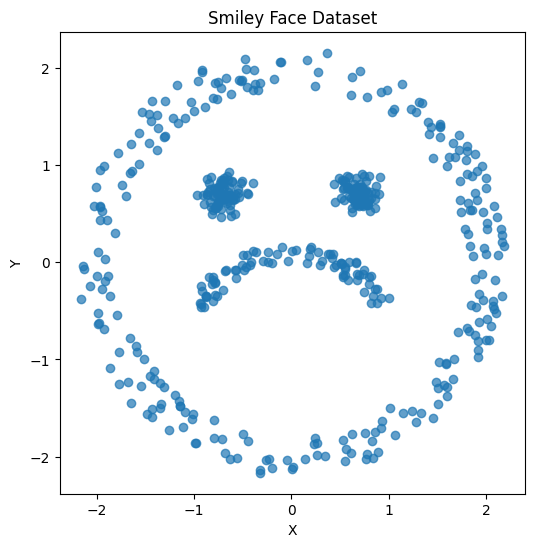

In [30]:
csv_path = "smiley_dataset.csv" 
smile = pd.read_csv(csv_path) 
plt.figure(figsize=(6,6)) 
plt.scatter(smile['X'], smile['Y'], alpha=0.7) 
plt.title('Smiley Face Dataset') 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.axis('equal') 
plt.show()

In [31]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [32]:
# K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(smile[['X', 'Y']])
smile['kmeans'] = kmeans.labels_

In [33]:
# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(smile[['X', 'Y']])
smile['dbscan'] = dbscan.labels_

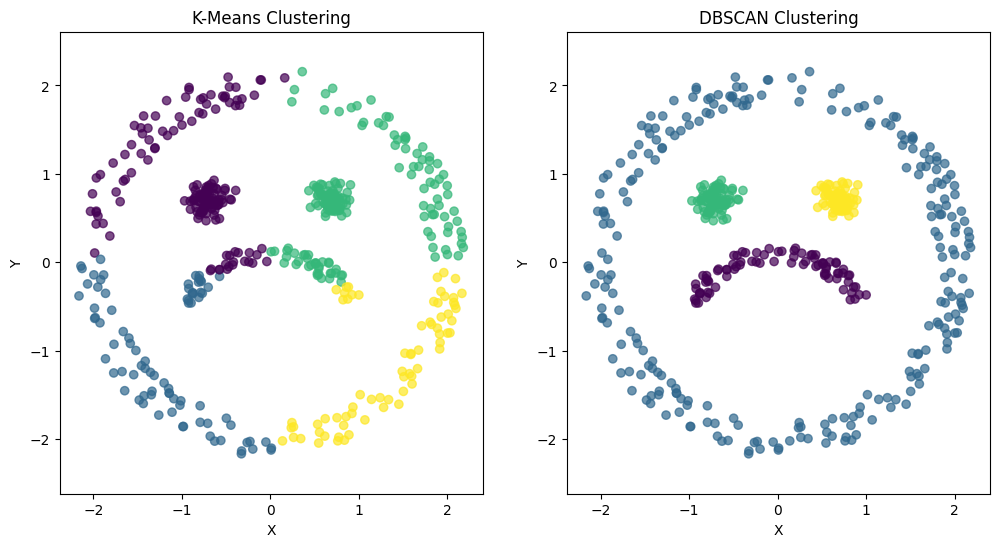

In [34]:
# Plotting
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.scatter(smile['X'], smile['Y'], c=smile['kmeans'], alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(smile['X'], smile['Y'], c=smile['dbscan'], alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

plt.show()

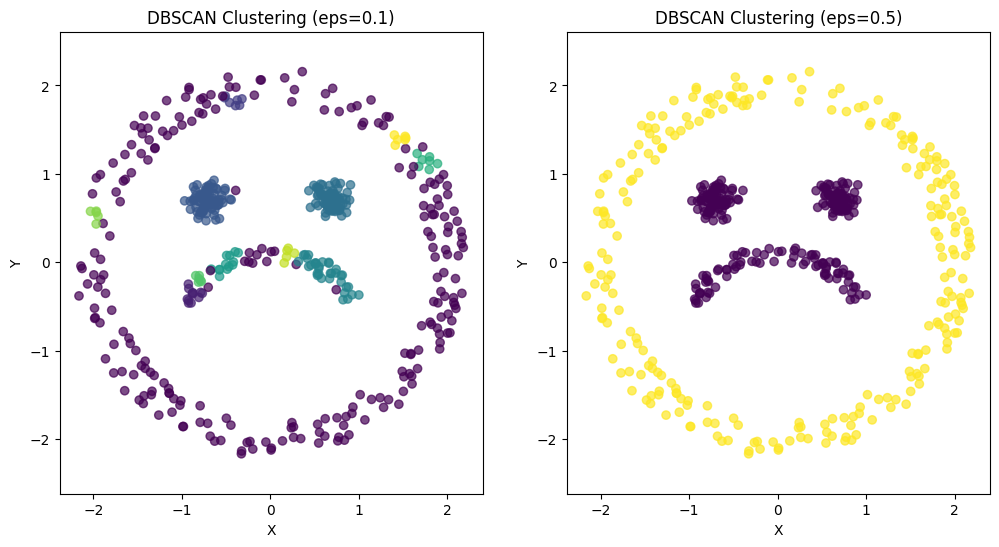

In [35]:
# Experimenting with DBSCAN Parameters
plt.figure(figsize=(12,6))

dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(smile[['X', 'Y']])

plt.subplot(1, 2, 1)
plt.scatter(smile['X'], smile['Y'], c=dbscan.labels_, alpha=0.7)
plt.title('DBSCAN Clustering (eps=0.1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(smile[['X', 'Y']])

plt.subplot(1, 2, 2)
plt.scatter(smile['X'], smile['Y'], c=dbscan.labels_, alpha=0.7)
plt.title('DBSCAN Clustering (eps=0.5)')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

plt.show()

# Questions to Answer:

## 1: How K-Means and DBSCAN Handle the Smiley Dataset  
Both **K-Means** and **DBSCAN** are clustering techniques, but they work in different ways. Let’s understand them using the **smiley face dataset**.  

### 🔹 K-Means: Grouping Based on Distance  
- K-Means divides the points into **4 clusters** (since we assume 4 groups in the smiley face).  
- It works by placing **4 centers** randomly and then adjusting them so that each point belongs to the nearest center.  
- **Problem?** K-Means assumes that clusters are **circular**, which makes it difficult to correctly group the **curved smile**. It may mix up points or break the smile into odd groups.  

### 🔹 DBSCAN: Grouping Based on Density  
- DBSCAN forms clusters by **finding dense areas** of points.  
- If points are **close together**, DBSCAN considers them part of the same group.  
- Unlike K-Means, **it doesn’t assume clusters are circular**—which is **great for the curved smile!**  
- DBSCAN can also **ignore outliers** (random points that don’t belong anywhere).  


## 2: Why DBSCAN Works Better for the Smiley?  

✅ **It doesn’t force clusters into circles** → So, the smile is detected properly.  
✅ **It removes noise/outliers** → Points that don’t belong to any cluster are ignored.  
✅ **No need to set the number of clusters** → Unlike K-Means, which requires you to decide **k=4** in advance.  

However, **DBSCAN needs the right settings**:  
- **eps (radius):** How close points must be to be part of the same cluster.  
- **min_samples:** The minimum number of points needed to form a group.  

If these values are too small, it **may break clusters into tiny pieces**. If too big, it **may merge separate clusters together**.  